# Metody optymalizacji decyzji

### Metoda AHP

In [116]:
import numpy as np
from functools import reduce

In [117]:
def ahp_method(dataset, wd = 'm'):
    inc_rat  = np.array([0, 0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45]) # indeks losowy r
    X        = np.copy(dataset) # analizowana macierz
    weights  = np.zeros(X.shape[1]) 
    if (wd == 'm' or wd == 'mean'):
        weights  = np.mean(X/np.sum(X, axis = 0), axis = 1)
    elif (wd == 'g' or wd == 'geometric'):
        for i in range (0, X.shape[1]):
            weights[i] = reduce( (lambda x, y: x * y), X[i,:])**(1/X.shape[1])
        weights = weights/np.sum(weights)   # względne wagi (krok 3 Ranking częściowy wg Trzaskalika)   
    vector   = np.sum(X*weights, axis = 1)/weights  
    lamb_max = np.mean(vector)
    cons_ind = (lamb_max - X.shape[1])/(X.shape[1] - 1) # wartoisc obliczone w kroku 2 Wspolczynnik zgodnosci wg Trzaskalika
    rc       = cons_ind/inc_rat[X.shape[1]] # lambda max
    return weights, vector, lamb_max, cons_ind, rc

weights - średnie dla każdego wiersza (względne wagi porównywanych elementów)

vector - elementy otrzymane w kroku 2. obliczania Wspołczynnika zgodności wg Trzaskalika

lamb_max - lambda maksymalna

rc - współczynnik zgodności

In [118]:
weight_derivation = 'mean' # wyliczamy wagi porównywanych elementów według średniej

#### Kalorie

In [109]:
dataset = np.array([
  #g1     g2     g3     g4     g5                
  [1, 1/5, 1/3],   #g1
  [5, 1, 4],   #g2
  [3, 1/4, 1]  
])

In [110]:
# Call AHP Function
weights, vector, lamb_max, cons_ind, rc = ahp_method(dataset, wd = weight_derivation)


In [111]:
weights

array([0.10384738, 0.66507024, 0.23108238])

In [112]:
vector

array([3.022598  , 3.17054729, 3.06770294])

In [113]:
lamb_max

3.086949408400003

In [114]:
cons_ind

0.043474704200001435

In [115]:
rc

0.07495638655172662

In [54]:
# Weigths
for i in range(0, weights.shape[0]):
  print('w(g'+str(i+1)+'): ', round(weights[i], 3))

IndexError: tuple index out of range

In [17]:
# Consistency Ratio
print('RC: ' + str(round(rc, 2)))
if (rc > 0.10):
  print('The solution is inconsistent, the pairwise comparisons must be reviewed')
else:
  print('The solution is consistent')

RC: 0.0
The solution is consistent


#### Metoda Electre

In [3]:
import numpy as np

from pyDecision.algorithm import electre_i

In [4]:
# ELECTRE I
    
# Parameters
c_hat = 1.00
d_hat = 0.40

W = [0.1, 0.2, 0.1, 0.1, 0.1, 0.2]

# Dataset
dataset = np.array([
                [194, 22, 10, 4, 200, 2.29],   #a1
                [121.5, 16.5, 4.5, 3.6, 150, 2.29],   #a2
                [145.5, 16.5, 7.5, 3, 150, 3.09],   #a3
                [186, 28, 6, 4.8, 200, 3.19],   #a4
                [183, 12.9, 6, 19.5, 150, 3.19]    #a5
                ])

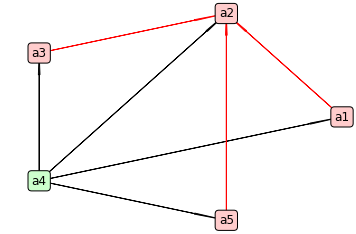

In [5]:
# Call Electre I Function
concordance, discordance, dominance, kernel, dominated = electre_i(dataset, W = W, remove_cycles = True, c_hat = 0.75, d_hat = 0.50, graph = True)

In [6]:
# Concordance Matrix
np.ndarray.round(concordance, decimals = 2)

array([[1.  , 1.  , 0.75, 0.38, 0.62],
       [0.25, 1.  , 0.5 , 0.  , 0.38],
       [0.25, 0.87, 1.  , 0.12, 0.5 ],
       [0.75, 1.  , 0.87, 1.  , 0.87],
       [0.38, 0.75, 0.62, 0.5 , 1.  ]])

In [7]:
# Discordance Matrix
np.ndarray.round(discordance, decimals = 2)

array([[0.  , 0.  , 0.01, 0.08, 0.21],
       [1.  , 0.  , 0.33, 0.89, 0.85],
       [0.69, 0.01, 0.  , 0.69, 0.52],
       [0.11, 0.  , 0.02, 0.  , 0.2 ],
       [0.69, 0.05, 0.05, 0.69, 0.  ]])

In [8]:
# Dominnce Matrix
np.ndarray.round(dominance, decimals = 2)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [9]:
# Kernel Alternatives
kernel

['a4']

In [10]:
# Dominated Alternatives
dominated

['a1', 'a2', 'a3', 'a5']

#### Metoda Promethee

In [1]:
from EasyMCDM.models.Promethee import Promethee

data = {
  "naturalny": [194, 22, 10, 4, 200, 2.29],
  "lekki": [121.5, 16.5, 4.5, 3.6, 150, 2.29],
  "szczypiorek": [145.5, 16.5, 7.5, 3, 150, 3.09],
  "wysokobialkowy": [186, 28, 6, 4.8, 200, 3.19],
  "jagody": [183, 12.9, 6, 19.5, 150, 3.19]
}
weights = [0.1, 0.2, 0.1, 0.1, 0.1, 0.2]
prefs = ["min","max","min","min","max","min"]

p = Promethee(data=data, verbose=False)
res = p.solve(weights=weights, prefs=prefs)
print(res)

{'phi_negative': [('lekki', 0.7000000000000001), ('naturalny', 1.2), ('wysokobialkowy', 1.3000000000000003), ('szczypiorek', 1.4000000000000001), ('jagody', 2.3000000000000003)], 'phi_positive': [('lekki', 1.9000000000000001), ('naturalny', 1.7000000000000002), ('wysokobialkowy', 1.5), ('szczypiorek', 1.4000000000000001), ('jagody', 0.4)], 'phi': [('lekki', 1.2000000000000002), ('naturalny', 0.5000000000000002), ('wysokobialkowy', 0.19999999999999973), ('szczypiorek', 0.0), ('jagody', -1.9000000000000004)], 'matrix': 'Please run verbose to get the Promethee II matrix!'}
